In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [53]:
#Creating a random dataset
np.random.seed(42)
data = np.random.normal(loc = 50,scale = 10,size = 100) #Normal data with mean 50 and std deviation 10
outliers = np.array([10,110,5,120]) #Outliers
data = np.concatenate([data,outliers])

In [55]:
df = pd.DataFrame(data,columns=['Values'])
df.head()

,Values
0,54.967142
1,48.617357
2,56.476885
3,65.230299
4,47.658466


In [57]:
df.tail()

,Values
99,47.654129
100,10.000000
101,110.000000
102,5.000000
103,120.000000


In [59]:
df


,Values
0,54.967142
1,48.617357
2,56.476885
3,65.230299
4,47.658466
...,...
99,47.654129
100,10.000000
101,110.000000
102,5.000000


In [61]:
df.shape

(104, 1)

In [63]:
df.isna().sum()

Values    0
dtype: int64

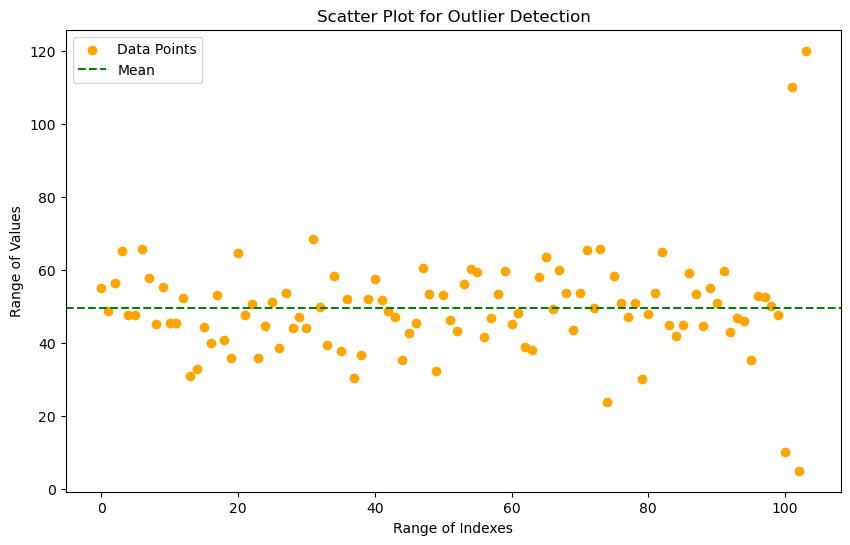

In [86]:
#A scatter plot helps you to find the outliers visually
plt.figure(figsize=(10,6))
plt.scatter(x = range(len(df)),y = df['Values'],color = "orange",label="Data Points")
plt.axhline(y = df['Values'].mean(),linestyle="--",color = "green",label="Mean")
plt.legend()
plt.title("Scatter Plot for Outlier Detection")
plt.xlabel("Range of Indexes")
plt.ylabel("Range of Values")
plt.show()

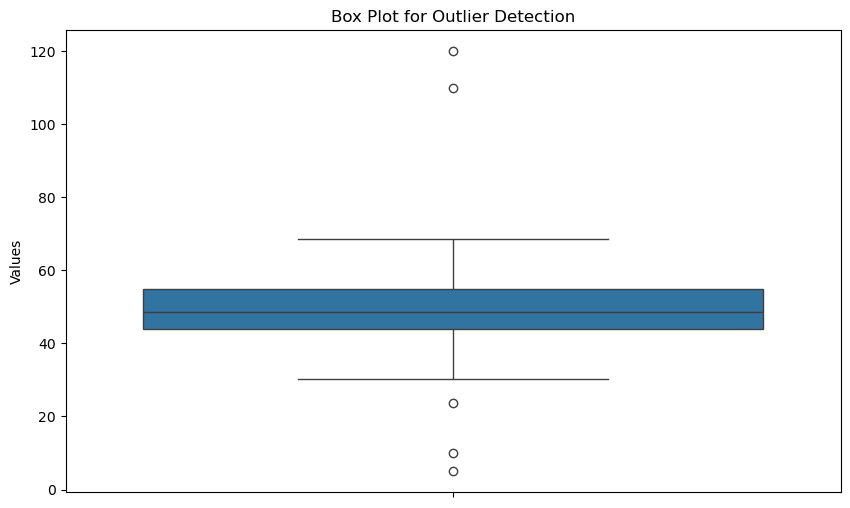

In [84]:
#Visualizing outliers using boxplot
plt.figure(figsize=(10,6))
sns.boxplot(data = df,y = df['Values'])
plt.title("Box Plot for Outlier Detection")
plt.show()

In [90]:
df['Z-Score'] = zscore(df['Values'])
df['Outlier_Check'] = df['Z-Score'].apply(lambda x : "Outlier" if abs(x) > 3 else "Normal")
#Printing the outliers only
df[df['Outlier_Check'] == 'Outlier']

,Values,Z-Score,Outlier_Check
101,110.0,4.328173,Outlier
102,5.0,-3.175368,Outlier
103,120.0,5.042796,Outlier


In [100]:
#Outlier Detection using IQR(Inter Quartile Range)
Q1 = df['Values'].quantile(0.25)
Q3 = df['Values'].quantile(0.75)
IQR = Q3 - Q1

#Defiing Lower Bound
lower_bound = Q1 - 1.5 * IQR
#Defining Upper Bound
upper_bound = Q3 + 1.5 * IQR

#Detecting Outliers
df['Outlier_IQR'] = df['Values'].apply(lambda x : "Outlier" if(x < lower_bound or x > upper_bound) else "Normal")
df[df['Outlier_IQR'] == 'Outlier']


,Values,Z-Score,Outlier_Check,Outlier_IQR
74,23.802549,-1.831694,Normal,Outlier
100,10.000000,-2.818056,Normal,Outlier
101,110.000000,4.328173,Outlier,Outlier
102,5.000000,-3.175368,Outlier,Outlier
103,120.000000,5.042796,Outlier,Outlier


**Finding Outliers Using the IQR Method with a 5-Number Summary**
The 5-number summary consists of:
 
Minimum (Q0) → The smallest value in the dataset.
 
First Quartile (Q1) → The 25th percentile (lower quartile).
 
Median (Q2) → The 50th percentile (middle value).
 
Third Quartile (Q3) → The 75th percentile (upper quartile).
 
Maximum (Q4) → The largest value in the dataset

In [107]:
#Creating a 5-Number Summary Outlier Detection Mechanism
#Creating a sample random dataset
np.random.seed(42)
data = np.random.normal(loc = 50,scale = 10, size = 100)
outliers = np.array([10,110,5,120]) #Outliers
data = np.concatenate([data,outliers])

#Compute the 5 Number Summary
Q1 = np.percentile(data,25)
Q2 = np.median(data)
Q3 = np.percentile(data,75)
min_value = np.max(data)
max_value = np.min(data)


#Computing the IQR
IQR = Q3 - Q1


#Calculate Outlier Boundries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
